## Defining Directory

In [63]:
import os

In [64]:
neg_deceptive_dir = "DataSet/Dataset_Ott/negative_polarity/deceptive_from_MTurk"
neg_true_dir ="DataSet/Dataset_Ott/negative_polarity/truthful_from_Web"
pos_deceptive_dir ="DataSet/Dataset_Ott/positive_polarity/deceptive_from_MTurk"
pos_true_dir ="DataSet/Dataset_Ott/positive_polarity/truthful_from_TripAdvisor"


#### Importing deceptice review with negative sentiment

In [65]:
all_files = os.listdir(neg_deceptive_dir)

In [66]:
reviews=[]
file_names=[]
sentiment=[]
label_list=[]

In [67]:
for file in all_files:
   # open the file and then call .read() to get the text
   with open(neg_deceptive_dir+"/"+file) as f: 
        text = f.read()
        reviews.append(text)
        file_names.append(file)
        sentiment.append(0)
        label_list.append(0)

#### Importing deceptice review with positive sentiment

In [68]:
all_files = os.listdir(pos_deceptive_dir)

In [69]:
for file in all_files:
   # open the file and then call .read() to get the text
   with open(pos_deceptive_dir+"/"+file) as f: 
        text = f.read()
        reviews.append(text)
        file_names.append(file)
        sentiment.append(1)
        label_list.append(0)


#### Importing truthful review with negative sentiment

In [70]:
all_files = os.listdir(neg_true_dir)

In [71]:
for file in all_files:
   # open the file and then call .read() to get the text
   with open(neg_true_dir+"/"+file) as f: 
        text = f.read()
        reviews.append(text)
        file_names.append(file)
        sentiment.append(0)
        label_list.append(1)

#### Importing truthful review with positive sentiment

In [72]:
all_files = os.listdir(pos_true_dir)

In [73]:
for file in all_files:
   # open the file and then call .read() to get the text
   with open(pos_true_dir+"/"+file) as f: 
        text = f.read()
        reviews.append(text)
        file_names.append(file)
        sentiment.append(1)
        label_list.append(1)

### Creating a pandas dataframe to structure the data and visualizing data columns

In [74]:
import pandas as pd

In [75]:
data = pd.DataFrame([])

In [76]:
data["reviews"]=reviews

In [77]:
data["reviews_splitted"] = data["reviews"].apply(lambda x: x.split())

In [78]:
data["sentiment"]=sentiment
data["sentiment"] = data["sentiment"]

In [79]:
data

,reviews,reviews_splitted,sentiment
0,Affinia Chicago is one of the worst hotels I h...,"[Affinia, Chicago, is, one, of, the, worst, ho...",0
1,I recently stayed at the Affina Chicago hotel ...,"[I, recently, stayed, at, the, Affina, Chicago...",0
2,I stayed at the Affina Chicago for my annivers...,"[I, stayed, at, the, Affina, Chicago, for, my,...",0
3,If you are looking for a high end hotel on the...,"[If, you, are, looking, for, a, high, end, hot...",0
4,I just returned from a long weekend in Chicago...,"[I, just, returned, from, a, long, weekend, in...",0
...,...,...,...
1595,I stayed at The Talbott for 3 nights on busine...,"[I, stayed, at, The, Talbott, for, 3, nights, ...",1
1596,We loved the Talbott. The location was fabulou...,"[We, loved, the, Talbott., The, location, was,...",1
1597,My husband attended a conference in Chicago fo...,"[My, husband, attended, a, conference, in, Chi...",1
1598,This is a great find for downtown Chicago. The...,"[This, is, a, great, find, for, downtown, Chic...",1


In [80]:
import sklearn

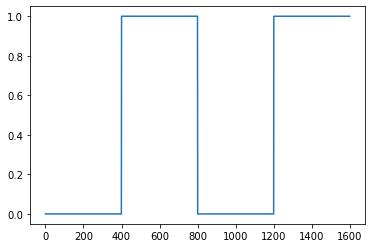

In [81]:
data["sentiment"].plot()

In [82]:
data["genuine"] = label_list

## Word count from reviews

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
dataset_word_counts = count_vect.fit_transform(data["reviews"])
print(dataset_word_counts.shape)

(1600, 9571)


## Implementing tf-idf from word cound

In [84]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
dataset_tfidf = tfidf_transformer.fit_transform(dataset_word_counts)
dataset_tfidf.shape
data["tf_idf"] = dataset_tfidf

### Implementing empath opensource instead of paid LIWC

In [85]:
import numpy as np
from empath import Empath
lexicon = Empath()
data["empath"] = data["reviews"].apply(lambda x: lexicon.analyze(x,normalize=True))


data["empath_vectors"]= data["empath"].apply(lambda x: list(x.values()))
array = pd.DataFrame.to_numpy(data["empath_vectors"])
empath_array = np.zeros((1600,194))
for i in range (0,1600):
    empath_array[i]= array[i]
print(empath_array.shape)

(1600, 194)


## Combining features together as feature matrix

In [86]:
import numpy as np

In [87]:
genuine = pd.DataFrame.to_numpy(data["genuine"])
sentiment = pd.DataFrame.to_numpy(data["sentiment"])
sentiment_feature = pd.DataFrame.to_numpy(data["sentiment"]).reshape(1600,1)

dataset_tfidf = np.matrix(dataset_tfidf.toarray())
data_set = np.concatenate((dataset_tfidf,empath_array),axis=1)
print(data_set.shape)
data_set_with_sentiment = np.concatenate((data_set,100*sentiment_feature),axis=1)

(1600, 9765)


## Save the DataFrame

In [88]:
data.to_csv('processed_dataframe.csv',sep="\t")

## Save the feature matrix

In [89]:
np.save("feature_matrix_with_sentiment.npy",data_set_with_sentiment)
np.save("feature_matrix_without_sentiment.npy", data_set)
np.save("genuine.npy",genuine)
np.save("sentiment.npy", sentiment)

In [90]:
data_set

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.01219512,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00446429,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.01470588,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.00746269,
         0.00746269],
        [0.        , 0.        , 0.        , ..., 0.        , 0.03      ,
         0.        ]])

## Shuffling and creating train test set

In [91]:
from sklearn.utils import shuffle

In [92]:
X, Y = shuffle(dataset_tfidf, sentiment, random_state=42)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train_validation, X_test, y_train_validation, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

X_train, X_validation, y_train, y_validation =  train_test_split(
    X_train_validation,y_train_validation, test_size = 0.25, random_state=42
)

In [95]:
np.save("train_validation_set_featureMat.npy",X_train_validation)
np.save("test_set_featureMat.npy",X_test)
np.save("train_validation_set_label.npy",y_train_validation)
np.save("test_set_label.npy", y_test)

# Implementing logistic regression to the dataset

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
clf = LogisticRegression(random_state=1).fit(X_train,y_train)

In [98]:
clf.score(X_test,y_test)

0.921875

In [99]:
clf.score(X_train,y_train)

0.9760416666666667

In [100]:
clf_2 = LogisticRegression(random_state=1).fit(X_train,y_train)
print(clf_2.score(X_test,y_test))
print(clf_2.score(X_validation,y_validation))

0.921875
0.925


 ###   Let's see the confution Matrix

In [101]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

Confusion matrix
[[161  12]
 [ 13 134]]


<Figure size 3600x2400 with 0 Axes>

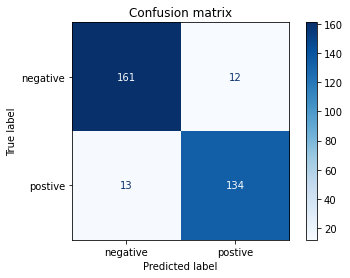

In [102]:
titles_options = [("Confusion matrix", None)]
#,("Normalized confusion matrix", 'true')
plt.figure(dpi=600)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["negative","postive"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig("sentiment_confmat_lr.png",dpi=600)
plt.show()

## LOGISTIC REGRESSION PARAMETER TUNING

In [103]:
candidates_C = np.linspace(.1,1,100)

In [104]:
candidates_C

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [105]:
mx_score=0
winner_c=0;
list_score=[]
for candidate in candidates_C:
    clf_3 = LogisticRegression(random_state=1,C=candidate).fit(X_train,y_train)
    vd_score = clf_3.score(X_validation,y_validation)
    list_score.append(vd_score)
    
    if(vd_score >= mx_score):
        winner_c=candidate
        mx_score = vd_score
    

In [106]:
import matplotlib.pyplot as plt

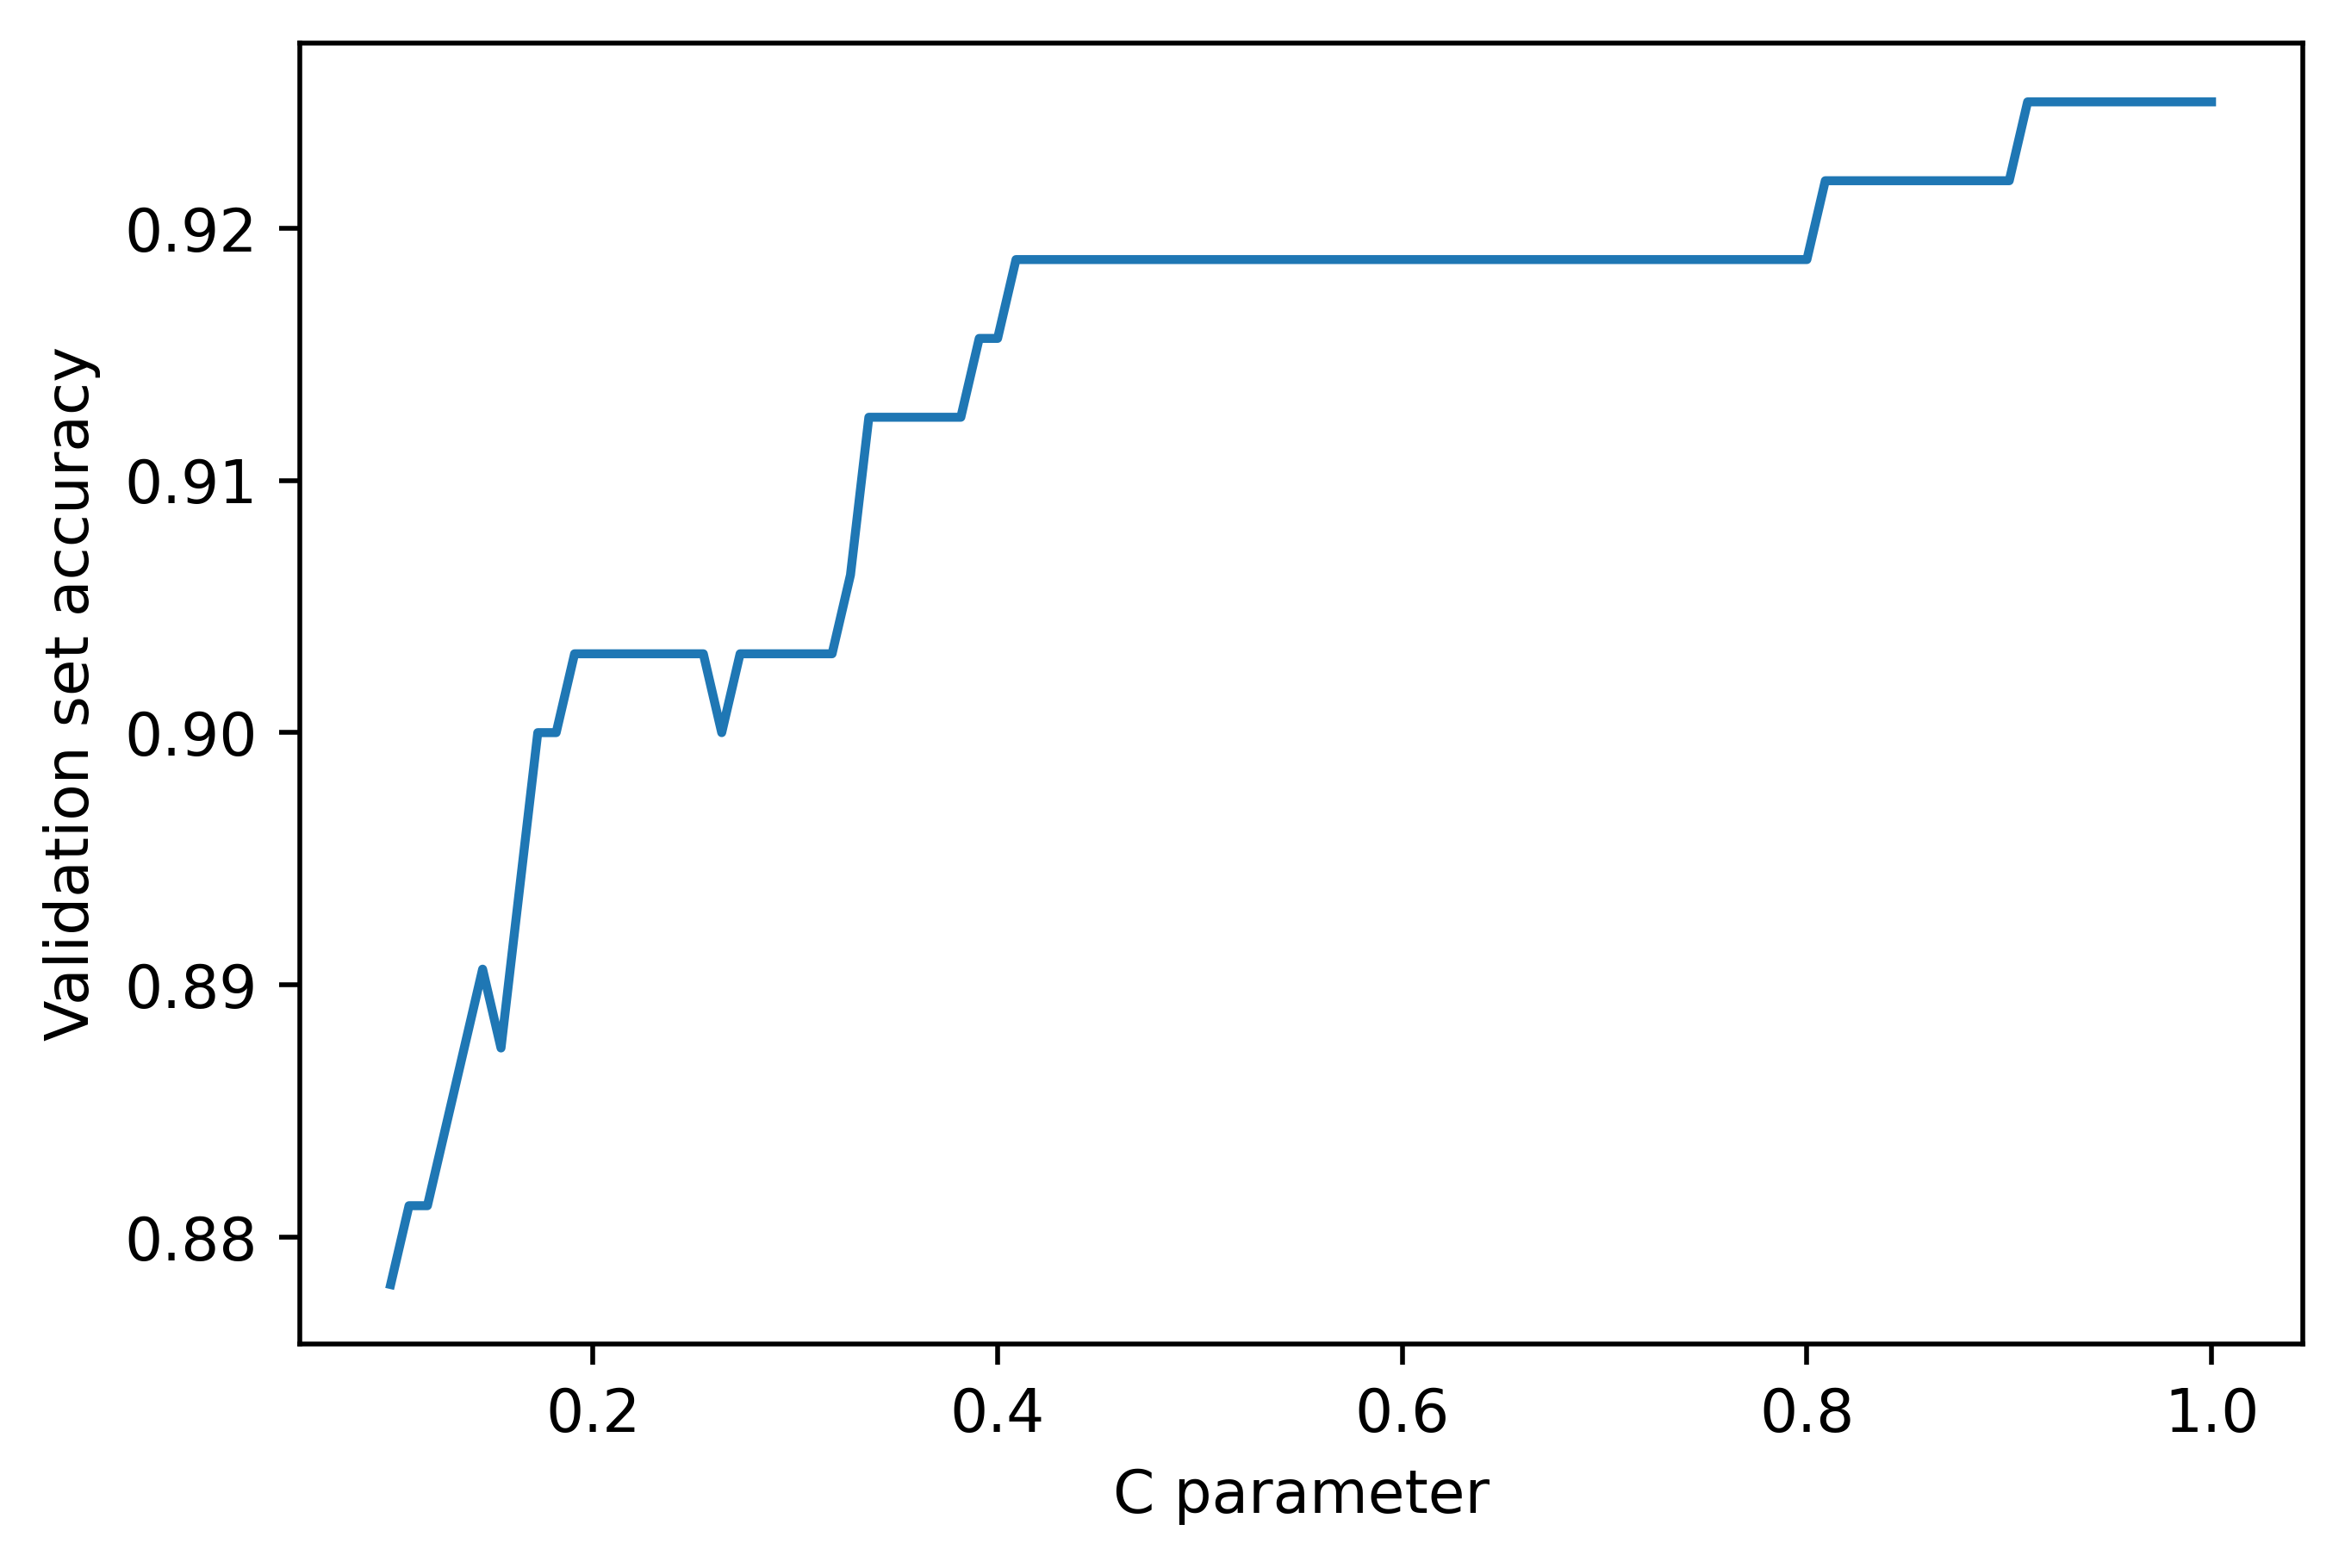

In [107]:
plt.figure(dpi=500)
plt.plot(candidates_C,list_score)
plt.xlabel("C parameter")
plt.ylabel("Validation set accuracy")

plt.savefig("lr_C_tuning.png")
plt.show()

In [108]:
print(winner_c)
Global_winner_c = winner_c
clf_3 = LogisticRegression(random_state=1,C=winner_c)
clf_3.fit(X_train,y_train)
print(clf_3.score(X_test,y_test))
print(clf_3.score(X_validation,y_validation))

1.0
0.921875
0.925


## Tuning other parameters like solver and penalty

In [109]:
clf_3 = LogisticRegression(random_state=1,max_iter=400,C=winner_c,penalty="l1",solver="liblinear")
clf_3.fit(X_train,y_train)
print(clf_3.score(X_test,y_test))
print(clf_3.score(X_validation,y_validation))

0.875
0.865625


In [110]:
clf_3.penalty

'l1'

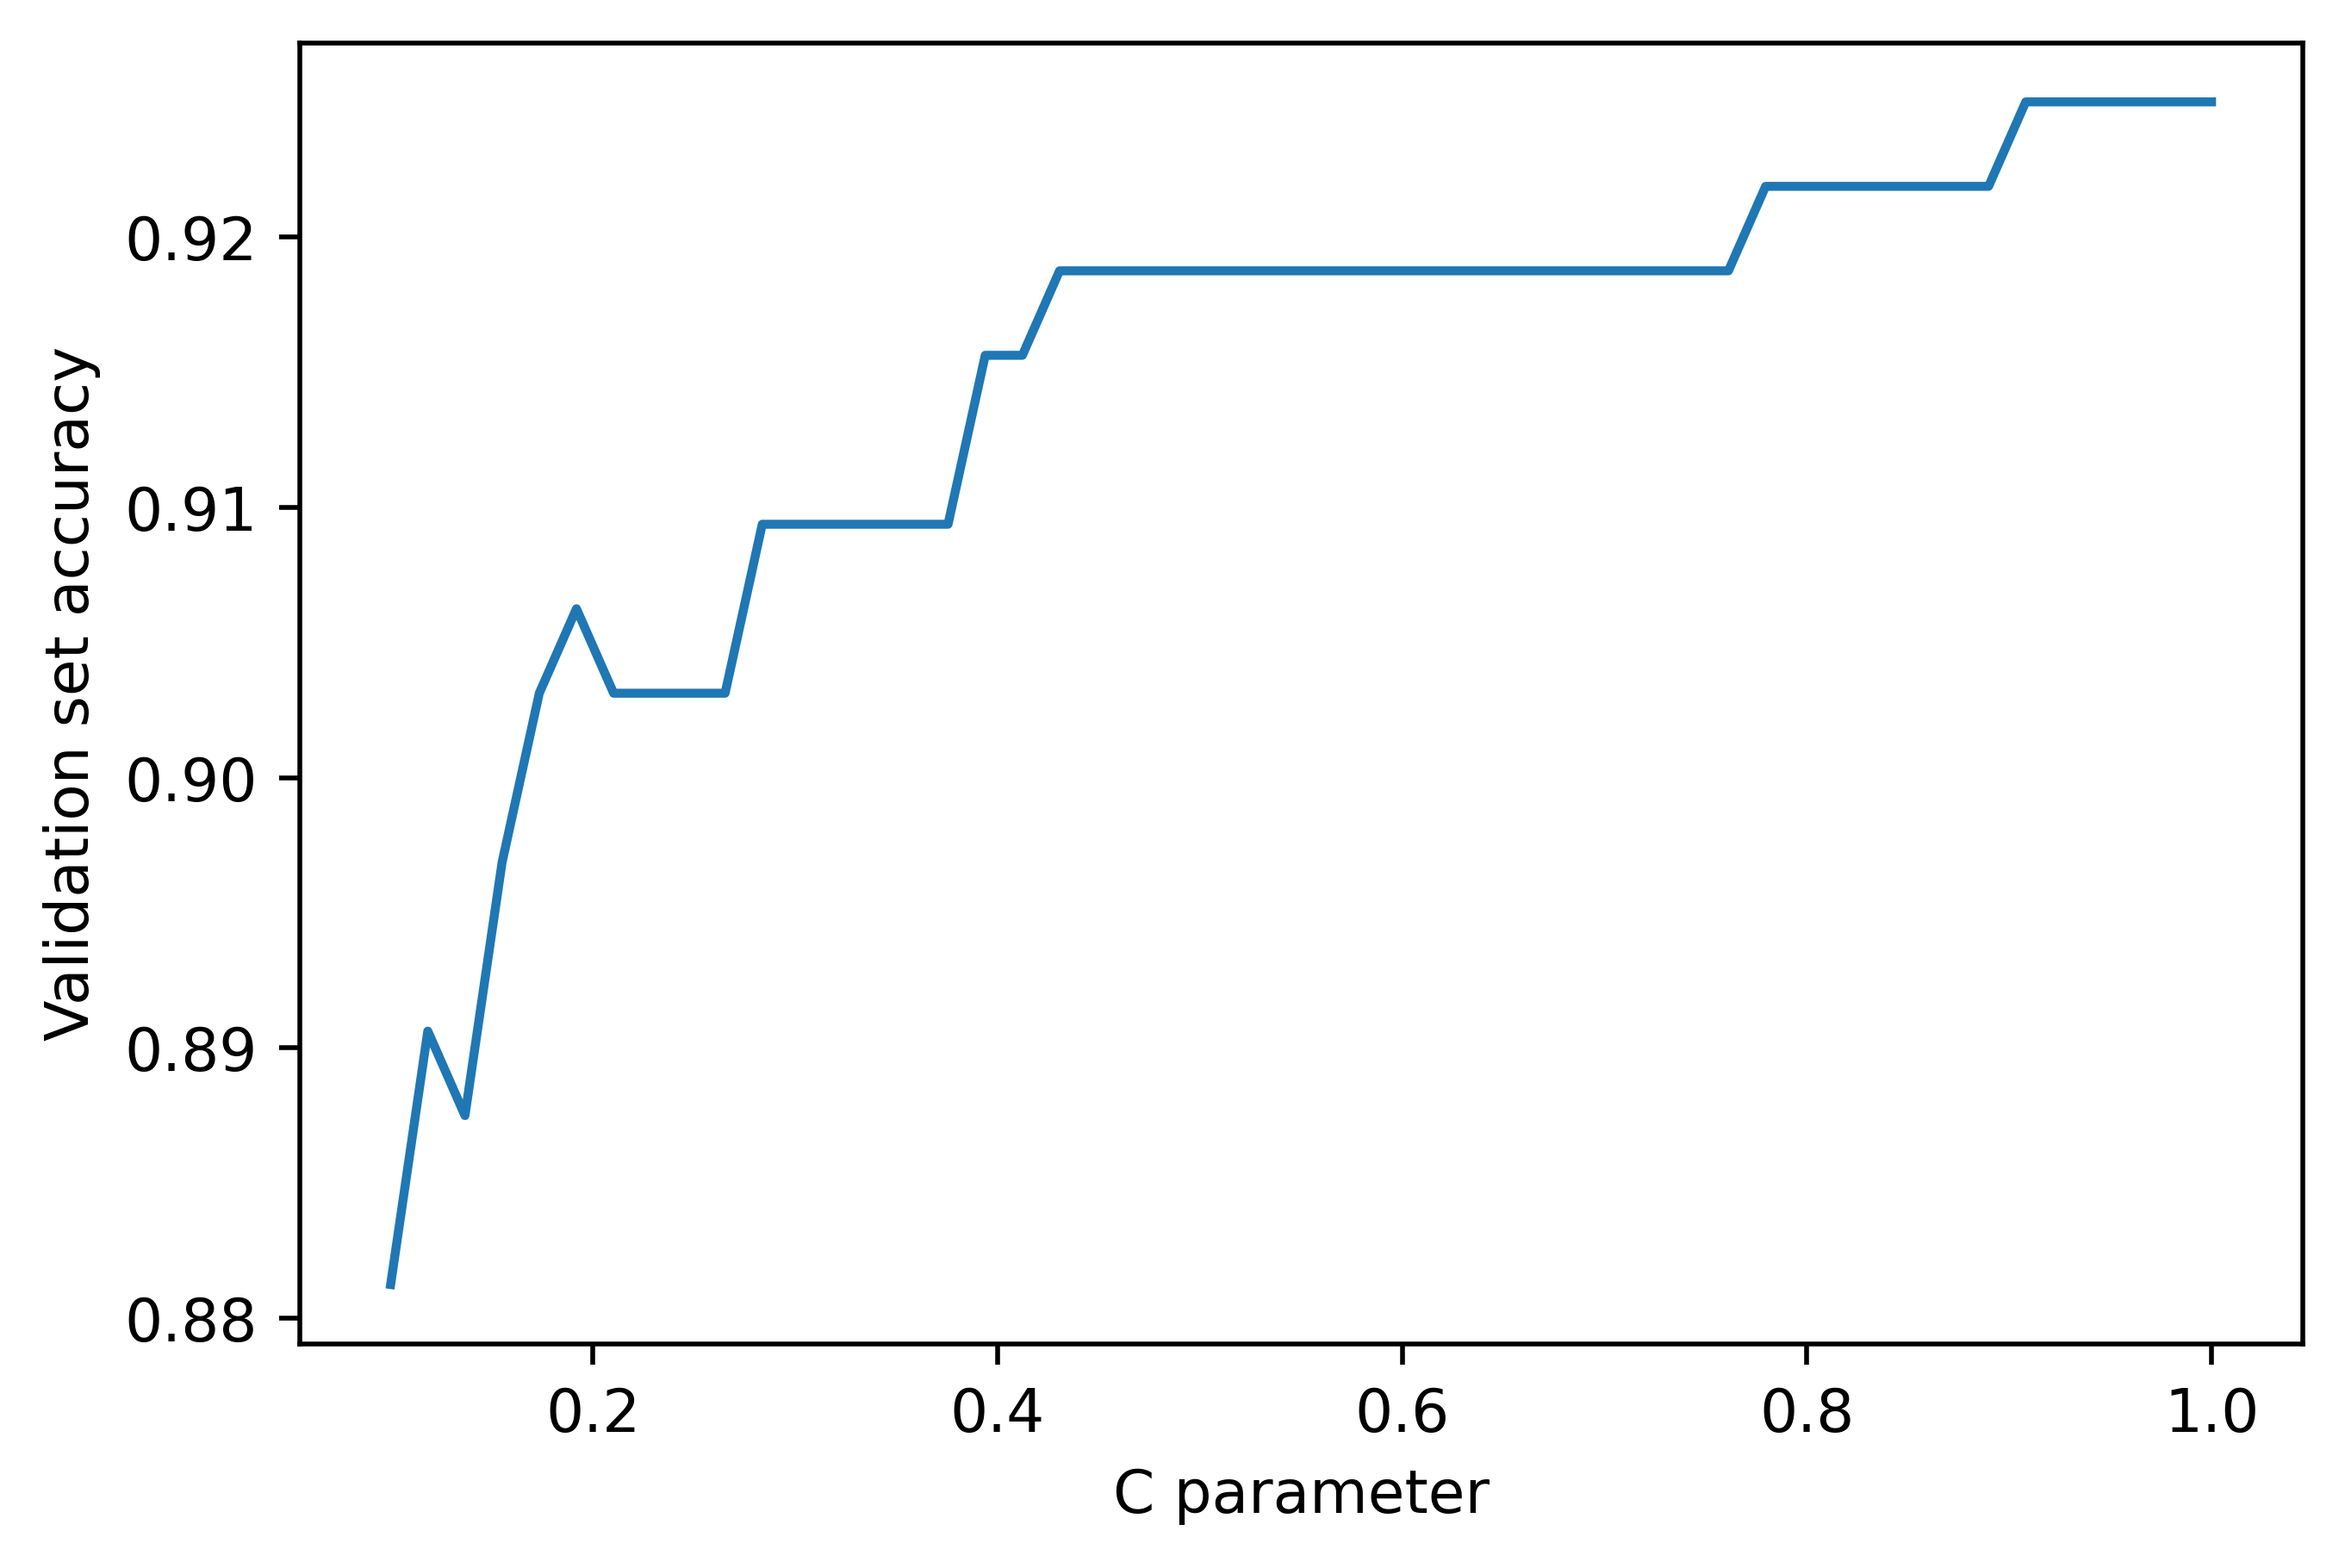

In [111]:
candidates_C = np.linspace(.1,1,50)
mx_score=0
winner_c=0;
list_score=[]
for candidate in candidates_C:
    clf_3 = LogisticRegression(random_state=1,C=candidate,penalty="l2",solver="liblinear")
    clf_3.fit(X_train,y_train)
    vd_score = clf_3.score(X_validation,y_validation)
    list_score.append(vd_score)
    
    if(vd_score >= mx_score):
        winner_c=candidate
        mx_score = vd_score
        
plt.figure(dpi=500)
plt.plot(candidates_C,list_score)
plt.xlabel("C parameter")
plt.ylabel("Validation set accuracy")

plt.savefig("C_tuning_2.png")
plt.show()

In [112]:
clf_3 = LogisticRegression(random_state=1,max_iter=400,C=winner_c,penalty="l2",solver="liblinear")
clf_3.fit(X_train,y_train)
print(clf_3.score(X_test,y_test))
print(clf_3.score(X_validation,y_validation))

print("Result with SVM")
from sklearn import svm
clf_4 = svm.SVC(kernel = "rbf",probability=True)
clf_4.fit(X_train,y_train)
print(clf_4.score(X_test,y_test))

0.921875
0.925
Result with SVM
0.925
0.934375


## Analyze the F1 score against thresholds

In [113]:
def F1_score_measurement(model, X_data, y_true, threshold):
    predicted_y_prob = model.predict_proba(X_data)
    predicted_y = predicted_y_prob[:,1]>threshold
    predicted_y = predicted_y*1

    tp=tn=fp=fn=0
    for i in range(0, len(predicted_y)):
        if(predicted_y[i]==0 and y_true[i] == 0):
            tn+=1
        if(predicted_y[i]==1 and y_true[i] == 1):
            tp+=1
        if(predicted_y[i]==0 and y_true[i] == 1):
            fn+=1
        if(predicted_y[i]==1 and y_true[i] == 0):
            fp+=1
    
    result = {}
    
    result["tn"]=tn
    result["fp"]=fp
    result["fn"]=fn
    result["tp"]=tp
    
    result["accuracy"]= (tn+tp)/(tn+fp+fn+tp)
    result["precision"]= tp/(tp+fp+0.00000000001)
    result["recall"] = tp/(tp+fn+0.0000000000001)
    result["F1_score"]= (2* result["precision"]*result["recall"])/(result["precision"]+result["recall"]+0.000000001)
    
    return result

print(F1_score_measurement(clf_3,X_test,y_test,.5))
        

{'tn': 161, 'fp': 12, 'fn': 13, 'tp': 134, 'accuracy': 0.921875, 'precision': 0.9178082191780192, 'recall': 0.9115646258503395, 'F1_score': 0.914675767418063}


In [114]:
model = LogisticRegression(random_state=1,C=Global_winner_c)
model.fit(X_train,y_train)
for i in np.linspace(0,1,100):
    res=F1_score_measurement(model,X_test,y_test,i)
    print("Threshold = ", i*1.0, " F1_score = ", res["F1_score"])

Threshold =  0.0  F1_score =  0.6295503207677463
Threshold =  0.010101010101010102  F1_score =  0.6295503207677463
Threshold =  0.020202020202020204  F1_score =  0.6295503207677463
Threshold =  0.030303030303030304  F1_score =  0.6295503207677463
Threshold =  0.04040404040404041  F1_score =  0.6295503207677463
Threshold =  0.05050505050505051  F1_score =  0.6295503207677463
Threshold =  0.06060606060606061  F1_score =  0.6295503207677463
Threshold =  0.07070707070707072  F1_score =  0.6295503207677463
Threshold =  0.08080808080808081  F1_score =  0.6309012871217513
Threshold =  0.09090909090909091  F1_score =  0.6322580640837323
Threshold =  0.10101010101010102  F1_score =  0.6322580640837323
Threshold =  0.11111111111111112  F1_score =  0.6322580640837323
Threshold =  0.12121212121212122  F1_score =  0.6336206892222754
Threshold =  0.13131313131313133  F1_score =  0.6447368416683548
Threshold =  0.14141414141414144  F1_score =  0.6533333328934076
Threshold =  0.15151515151515152  F1_s

## ROC Curve Drawing

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [116]:
def draw_ROC(model, x_data, y_true):

    #No skill probabilities
    ns_probs = [0 for _ in range(len(y_true))]

    # predict probabilities
    lr_probs = model.predict_proba(x_data)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(y_true, ns_probs)
    lr_auc = roc_auc_score(y_true, lr_probs)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_true, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_true, lr_probs)

    # plot the roc curve for the model
    plt.figure(dpi=1000)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.savefig("ROC_LR.png")
    
    plt.show()

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.975


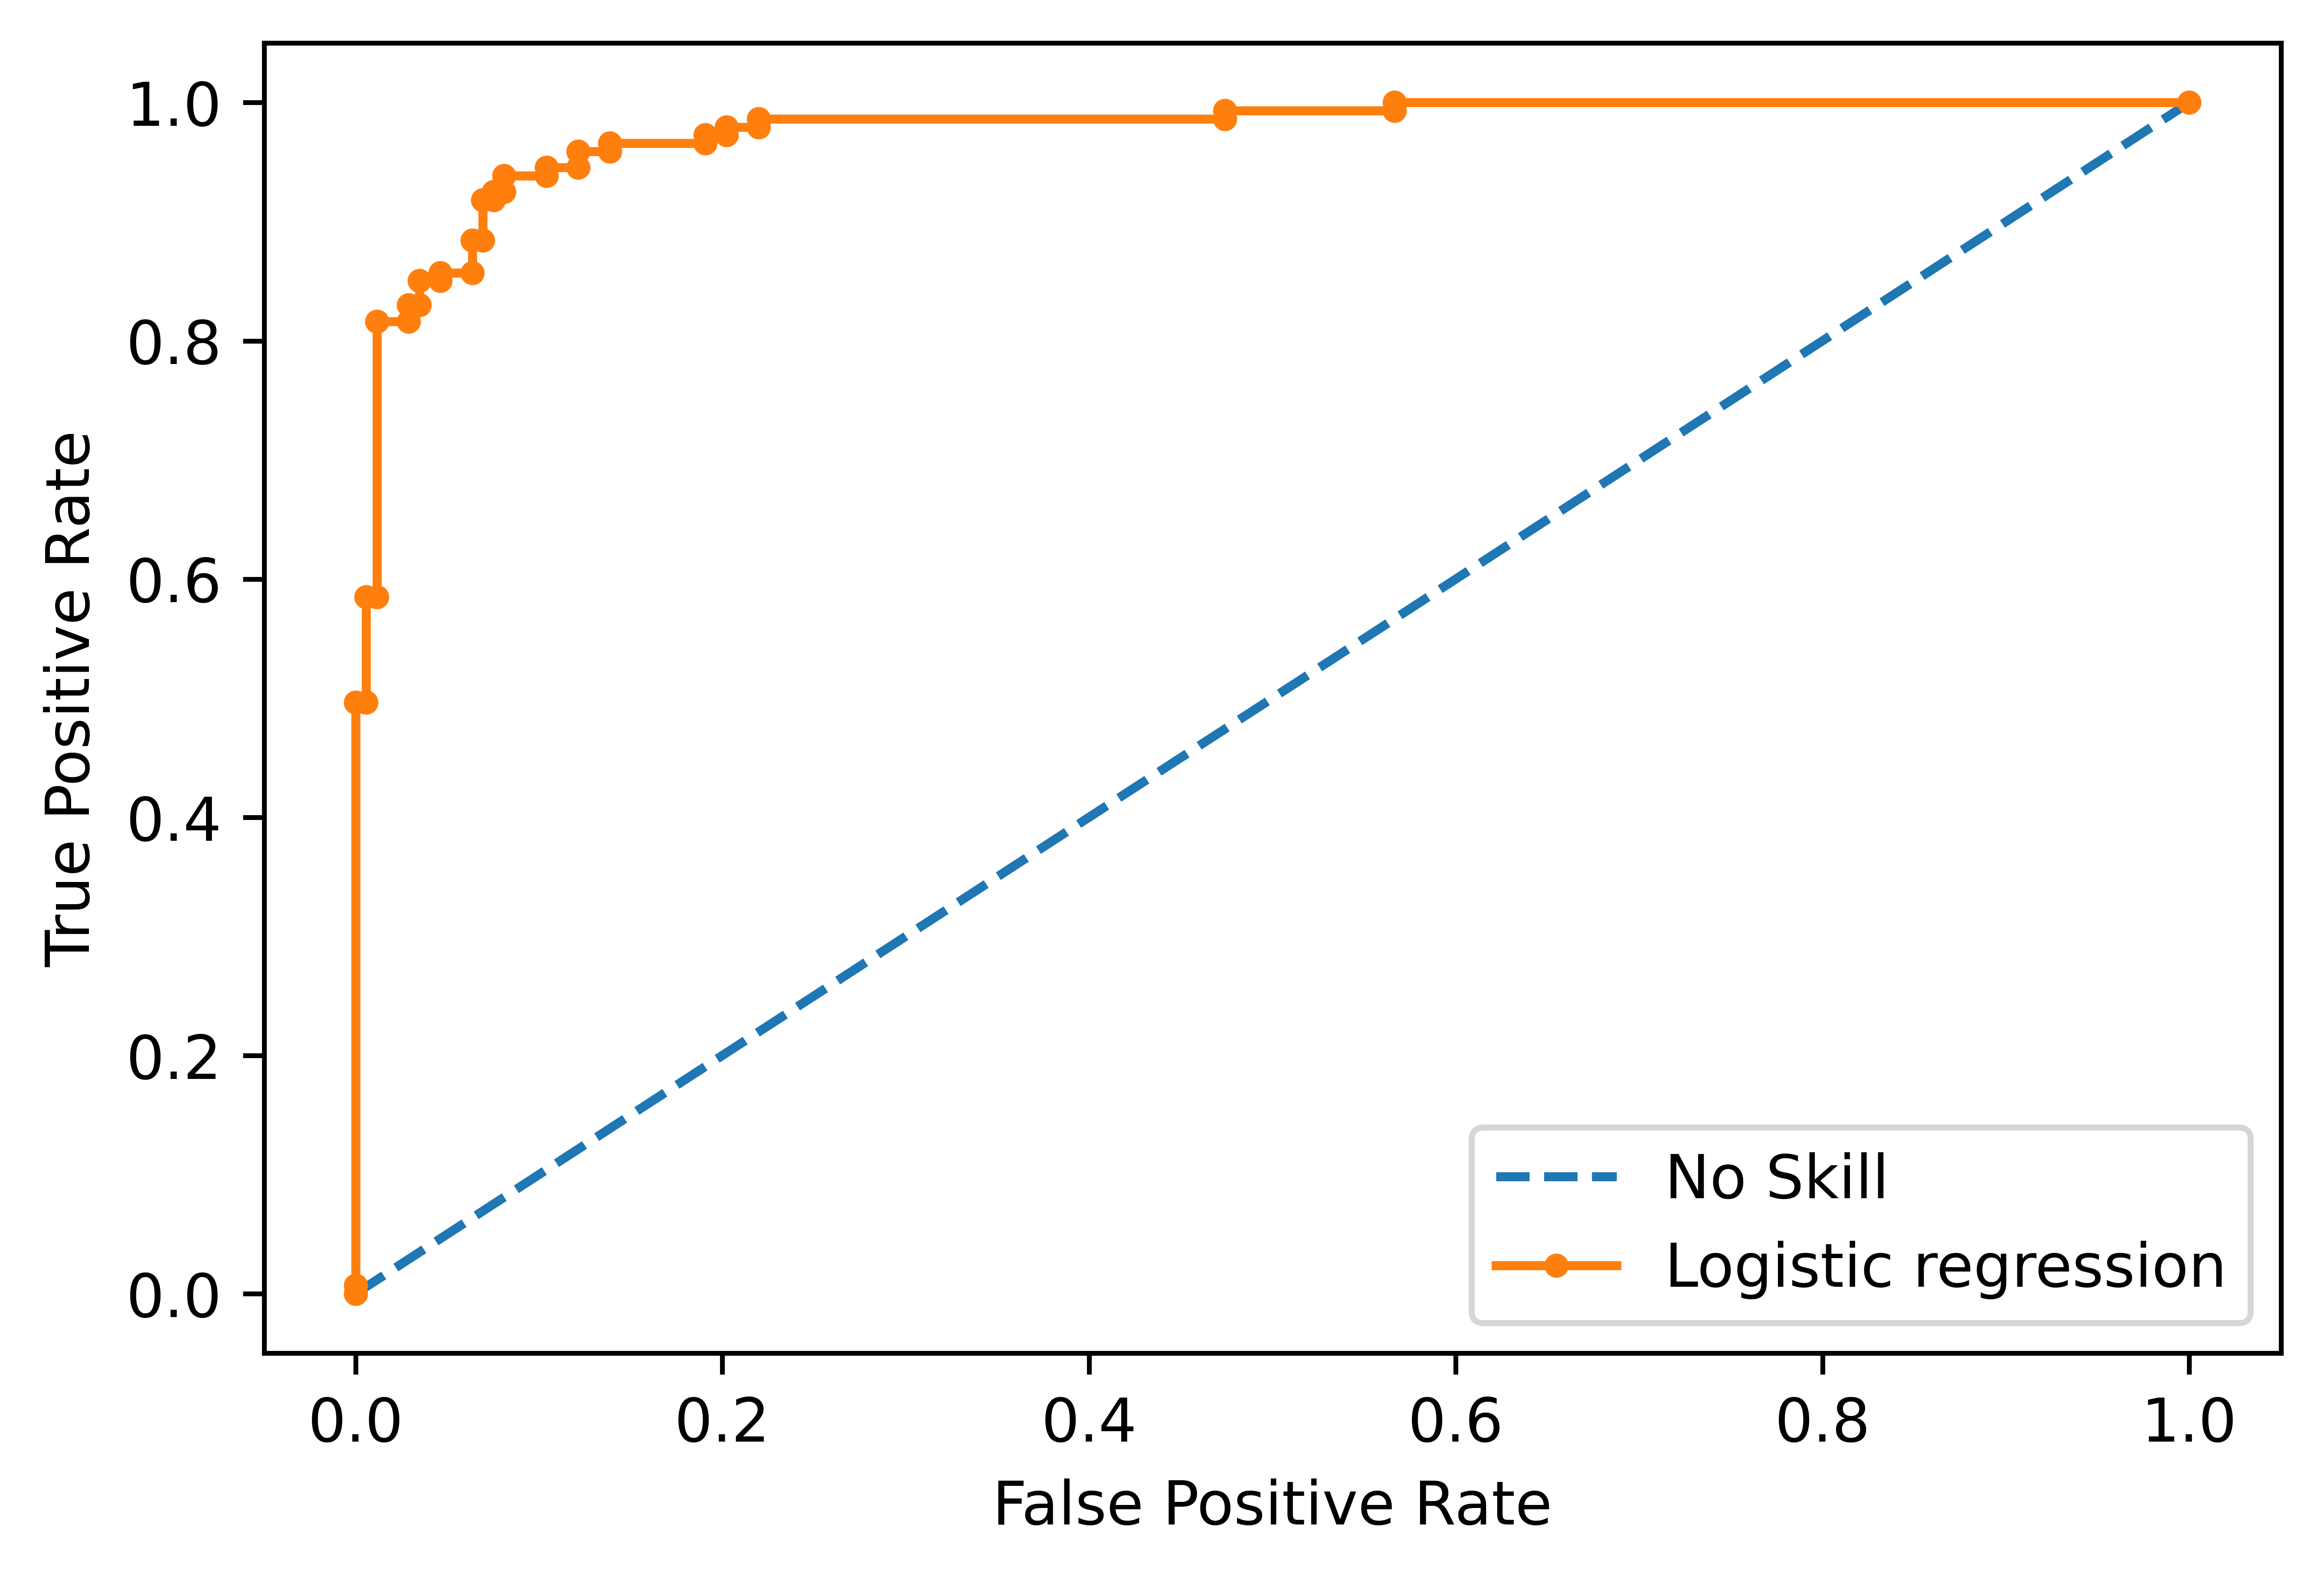

In [117]:
draw_ROC(model,X_test,y_test)

# Lets implement the probabilisctic score to classify fake online reviews

In [118]:
predicted_sentiment = model.predict_proba(dataset_tfidf)[:,1]

In [119]:
predicted_sentiment

array([0.21020547, 0.16005394, 0.35525055, ..., 0.83202352, 0.70534567,
       0.76352023])

In [120]:
print(sum(predicted_sentiment[:400])/400)
print(sum(predicted_sentiment[400:800])/400)
print(sum(predicted_sentiment[800:1200])/400)
print(sum(predicted_sentiment[1200:1600])/400)

0.2504722576203625
0.76345503437745
0.29082987223183293
0.7278790798654379


In [121]:
average = [0.24908456331321413,0.7661043232281528,0.2888772893176976,0.7286596219036768 ]

### Impact on sentiment score on fake review classification

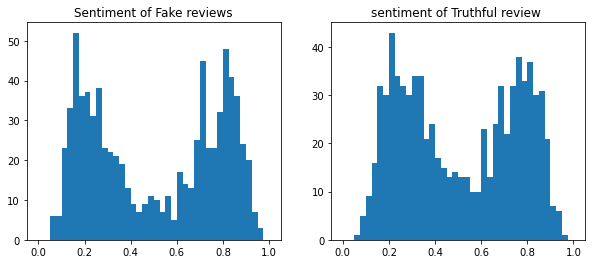

In [134]:
figure, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.hist(predicted_sentiment[0:800],bins=40,range = (0,1))
ax1.set_title("Sentiment of Fake reviews")
ax2.hist(predicted_sentiment[800:1600],bins=40, range = (0,1))
ax2.set_title("sentiment of Truthful review ")
plt.savefig("Sentiment_dist.png")

In [124]:
dataset_sentiment = np.concatenate(
    (empath_array, 100*sentiment_feature), axis=1)

from sklearn.utils import shuffle
X, Y = shuffle(dataset_sentiment, genuine, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

clf_withporbsent = LogisticRegression(random_state=1).fit(X_train,y_train)
print(clf_withporbsent.score(X_test,y_test))


0.59375


In [125]:
dataset_with_probabilistic_sentiment = np.concatenate(
    (empath_array, 100*predicted_sentiment.reshape(1600,1)), axis=1)

from sklearn.utils import shuffle
X, Y = shuffle(dataset_with_probabilistic_sentiment, genuine, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

clf_withporbsent = LogisticRegression(random_state=1).fit(X_train,y_train)
print(clf_withporbsent.score(X_test,y_test))


0.653125


In [126]:
dataset_sentiment = np.concatenate(
    (dataset_tfidf, 2.5*sentiment_feature), axis=1)

from sklearn.utils import shuffle
X, Y = shuffle(dataset_sentiment, genuine, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)

clf_withporbsent = LogisticRegression(random_state=1,max_iter=200).fit(X_train,y_train)
print(clf_withporbsent.score(X_test,y_test))

0.8625


In [127]:
dataset_with_probabilistic_sentiment = np.concatenate(
    (dataset_tfidf, 2.5*predicted_sentiment.reshape(1600,1)), axis=1)

from sklearn.utils import shuffle
X, Y = shuffle(dataset_with_probabilistic_sentiment, genuine, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)

clf_withporbsent = LogisticRegression(random_state=1,max_iter=200).fit(X_train,y_train)
print(clf_withporbsent.score(X_test,y_test))

0.865


## Lets try everything with SVM

In [128]:
from sklearn import svm
svm_classifier = svm.SVC(kernel = "rbf")


dataset_sentiment = np.concatenate(
    (empath_array, 0.5*sentiment_feature), axis=1)

from sklearn.utils import shuffle
X, Y = shuffle(dataset_sentiment, genuine, random_state=42)
X_train_validation, X_test, y_train_validation, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

X_train, X_validation, y_train, y_validation =  train_test_split(
    X_train_validation,y_train_validation, test_size = 0.25, random_state=42
)

clf_withporbsent = svm_classifier.fit(X_train,y_train)
print(clf_withporbsent.score(X_test,y_test))
print(clf_withporbsent.score(X_validation,y_validation))

0.640625
0.684375


In [129]:
dataset_with_probabilistic_sentiment = np.concatenate(
    (empath_array, 0.5*predicted_sentiment.reshape(1600,1)), axis=1)

from sklearn.utils import shuffle
X, Y = shuffle(dataset_with_probabilistic_sentiment, genuine, random_state=42)
X_train_validation, X_test, y_train_validation, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

X_train, X_validation, y_train, y_validation =  train_test_split(
    X_train_validation,y_train_validation, test_size = 0.25, random_state=42
)

clf_withporbsent = svm_classifier.fit(X_train,y_train)
print(clf_withporbsent.score(X_test,y_test))
print(clf_withporbsent.score(X_validation,y_validation))

0.665625
0.684375


In [130]:
dataset_sentiment = np.concatenate(
    (dataset_tfidf, 2.5*sentiment_feature), axis=1)

from sklearn.utils import shuffle
X, Y = shuffle(dataset_sentiment, genuine, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

clf_withporbsent = svm_classifier.fit(X_train,y_train)
print(clf_withporbsent.score(X_test,y_test))

0.8625


In [131]:
dataset_with_probabilistic_sentiment = np.concatenate(
    (dataset_tfidf, 2.5*predicted_sentiment.reshape(1600,1)), axis=1)

from sklearn.utils import shuffle
X, Y = shuffle(dataset_with_probabilistic_sentiment, genuine, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

clf_withporbsent = svm_classifier.fit(X_train,y_train)
print(clf_withporbsent.score(X_test,y_test))

0.89375
